<!-- <h1 style="text-align: center;"> Decomposition Workshop </h1> -->
# Decomposition Workshop

#### Mateus Augusto Schneider Castilhos<sup>1,3</sup>, Carina Marconi Germer<sup>2</sup>, Ellen Pereira Zambalde<sup>1,3</sup>, Leonardo Abdala Elias<sup>1,3</sup>

<sup>1</sup> Department of Electronics and Biomedical Engineering, School of Electrical and Computer Engineering, University of Campinas, Campinas, SP, Brazil

<sup>2</sup> Department of Biomedical Engineering, Federal University of Pernambuco, Recife, PE, Brazil

<sup>3</sup> Neural Engineering Research Laboratory, Center for Biomedical Engineering, University of Campinas, Campinas, SP, Brazil

In [12]:
# Identifying if it will run on Google Colab
if 'google.colab' in str(get_ipython()):
    !git clone -l -s https://github.com/MateusASchneiderCastilhos/EMG_Crosstalk_Decomposition_Workshop cloned-repo
    %cd cloned-repo

# Importing the need dependences to execute actual Python script
from dependencies import content
import numpy as np

Cloning into 'cloned-repo'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 44 (delta 19), reused 36 (delta 13), pack-reused 0
Unpacking objects: 100% (44/44), done.
/content/cloned-repo/cloned-repo


## Blind Source Separation (BSS)

&emsp;&ensp; The blind source separation (BSS) problem is one of the most debated topics in the signal processing area. These methods try to find the source signals, $s_j(t); j=[1,2,...,N]$, just by using their observation signals, $x_i(t); i=[1,2,...,M]$, which are generated by a mixing system, $𝑯$, applied to the source signals. However, in practical situations, neither the source signals and the mixing system are known, and this turns into a very complicated problem. So, the BSS techniques apply estimation methods to the observation signals $x_i(t)$ considering very few assumptions about the sources signals, in other to extract them [(COMON; JUTTEN, 2010)](#scrollTo=references). The cocktail party problem is introduced below to better understand the problem.

### Cocktail Party Problem

&emsp;&ensp; The cocktail party problem consists of finding the speech signals of the people in some room by recording the mixture of these signal using the microphones, [Figure 1](#figure_1). Note that this problem is well related to the BSS. Considering the discrete time $k$ (because we will used sampled data), the sources signals $s_1(k),s_2(k),s_3(k)$ are the speech signals and the observation signals $x_1(k),x_2(k),x_3(k)$ are the audio signals recorded by the microphones located in different coordinates of the space. The mixing system $𝑯$ is the space of the room and it is responsible to weigh each $j$ source signal considering the distance that it covers until to be recorded, but no information is known as this weighing is done. The speech signals that are reflected by the walls take more time until reach the microphone and so, they are delayed versions of the source signals that are recorded. This delay effect can be represented by $𝑯$ as well. Considering all these conditions and the fact that the sources signals are not known and neither the weighs of the $𝑯$, it is clear that this is not an easy problem to solve. Using the previous thought, it is possible to see the BSS in the decomposition process of the EMG. It's easy to note that for this situation the source signals $s_j(k)$ are the motor unit action potantial (MUAP) trains, the observation signals $x_i(k)$ are the EMG signals in each $i$ channel, and the mixing system $𝑯$ is the conductor volume between the source signals generator (MUs) and the electrodes.

<a name='figure_1'></a>
<figure align="center"><img src="https://drive.google.com/uc?export=view&id=1Rc9wvjVS79jmg5SoeSdHnqdwcsIypaez" width="500"/><figcaption align = "center"> Figure 1 - Cocktail party problem scheme with three source and observation signals.</figcaption></figure>

### Mathematical Contextualization

&emsp;&ensp; Still considering the example of the [cocktail party problem](#scrollTo=JLGid-CiRwZ7) and the simplest mixing system, i.e., $𝑯$ being a $3\times3$ constant matrix, the observation signals can be expressed as a linear combination of the source signals, [Equation 1](#eq1), or as matrix form, [Equation 2](#eq2), where $𝒙(k) = \left[ \begin{array}{c} x_1(k) & x_2(k) & x_3(k) \end{array} \right]^T$ and $𝒔(k) = \left[ \begin{array}{c} s_1(k) & s_2(k) & s_3(k) \end{array} \right]^T$. So, assuming that $𝑯$ has an inverse matrix, to obtain the original sources is just needed to find it and apply inversion techniques to obtain $𝑯^{-1}$. However, this is not easy as it looks like, because as there is no knowledge about the coeffcients of $𝑯$ its inverse can't be founded. Hence, the methods of BSS try to find a matrix $𝑩$ that better respresents the inverse matrix $𝑯^{-1}$ using the estimation and information theories as is showed in the next sections. 

<a name="eq1"></a>
$$\begin{array}{cc} x_1(k) = h_{11} s_1(k) + h_{12} s_2(k) + h_{13} s_3(k) & \\ x_2(k) = h_{21} s_1(k) + h_{22} s_2(k) + h_{23} s_3(k) & (1) \\ x_3(k) = h_{31} s_1(k) + h_{32} s_2(k) + h_{33} s_3(k) \end{array}$$
<br></br>
<a name="eq2"></a>
$$\begin{array}{ccc}𝒙(k)=𝑯𝒔(k), & 𝑯=\begin{bmatrix} h_{11} & h_{12} & h_{13} \\ h_{21} & h_{22} & h_{23} \\ h_{31} & h_{32} & h_{33} \end{bmatrix} & (2) \end{array}$$

&emsp;&ensp; From now, the observations and source signals can be seeing as random variables as well, and for each instant of discrete time $k$, $x_i(k)$ and $s_j(k)$ represents one realization of the random variable, so the time index can be droped, which imples that $𝒙$ is a random vector with random variabeles $x_i$. Note the the boldface letters represents vectors and matrices.

&emsp;&ensp; Some considerations about the BSS problem needed to be exposed:

1. The variances (energies) of the source signals can't be determined. As there is no knowledge about the mixig matrix $𝑯$ and the sources $s_j, j=1,...,M$, if the source $s_j$ is multipled by a constant $\alpha_j$, a scale factor of $1/\alpha_j$ may be present multiplying the elements of $𝑯$ (column $j$) that multiplies $s_j$ [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references). So, to solve the problem of finding the source signals, it is assumed that they have unit variance ($E\{s_j^2\}=1$, where $E\{\cdot\}$ is te expectation operator). This condition is used in the applied optimization procedures as a constraint to extract the sources. Note that the uncertain of the signal is present here, i.e., we can estimate the source but we can't know if the estimation is a positive ou negative version of the orignal source. However, this signal ambiguity is insignificant in most applications [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references).

2. The order of occurence of the source signals can't be determined. As before, not knowing the mixig matrix $𝑯$ and the sources $s_j, j=1,...,M$, it is possible freely change the
order of the elements in $𝒔$ and call any of the sources the first one. Formally, a permutation matrix $𝑷$ and its inverse can be intoduced in [Equation 2](#eq2) as $𝒙=𝑯𝑷^{-1}𝑷𝒔$, where $𝑷𝒔$ are the original sources, but in another order and $𝑯𝑷^{-1}$ is just a new unknown mixing matrix that should be estimated [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references).

3. Usually, when the number of sources are less or equal the number of observations ($N \leq M$) is possible to estimate the mixing matrix, and consequently its inverse. However when $M < N$ the mixing matrix are not invertible, and the problem of extracting the sources becomes different from the problem of estimating the mixing matrix [(COMON; JUTTEN, 2010)](#scrollTo=references). When this occurs, the sources can be estimated by iterativally executing an optmization algorithm, and the column vectors used to find these sources can be used as columns of the estimated $\widehat{𝑯}^{-1}$. The matrix $𝑩$ can be named separation matrix, because is the matrix that give the estimated source signals, and when the mixing matrix is squared the separation matrix can be seen as the inverse of its estimation ($𝑩=\widehat{𝑯}^{-1}$).

&emsp;&ensp; The BSS methods do some assumptions about the source signals in order to choose which method will be applied to solve the problem. Surprisingly, the assumptions that the sources signals $s_j$ (remember, modeled as random variables) are statistically independent of each other and their probability distribuition is not gaussian, it is enough to extract the sources (or to estimate $𝑯^{-1}$). These assumptions lead to the Independent Component Analysis (ICA) methods, the ICA technique is one of the most used to solve de BSS problem because of its generality. Before explaining the ICA another technique is presented beforehand, namely Principal Component Analysis, because it is can be used as an important pre-processing step for the ICA.

## Principal Component Analysis (PCA)

&emsp;&ensp; The principal component analysis (PCA) is a classic techniques in statistical data analysis, feature extraction and data compression. This technique is usually applied to a set of multivariate measurements in which the data present some redundacy, and this redudancy in PCA is measured by second order statistics, i.e., covariances [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references). The aim of the PCA is to find the representation of the data with less redundancy as possible, or in other words, the PCA tries to decorrelates the data as maximum as possible. This procedure may be done using or not the dimension reduction, which reinforces the influence of the most significant components that generates that dataset (namely principal components), and reduce the influence of the least significant components [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references).

&emsp;&ensp; To ilustrate how the PCA works, consider two random variabels $s_1,s_2$ (source signals), where $s_1$ is a uniform variable and $s_2$ is a laplacian variable, both with zero mean and unit variance. Their joint distribuition is plotted below. Remember, here we know the sources a priori just as a didact form to show the result of the PCA method and compare it to the "true" sources. The objective here is understand the steps of PCA and why when associate with whitening is an important pre-processing step to the ICA.

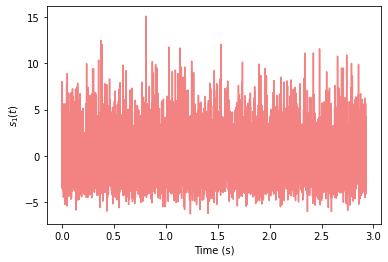

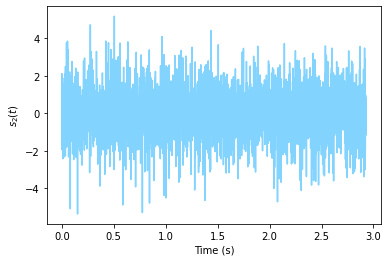

Mean s1 =  0.0 		Std s1 =  2.77
Mean s2 =  0.001 		Std s2 =  1.004 



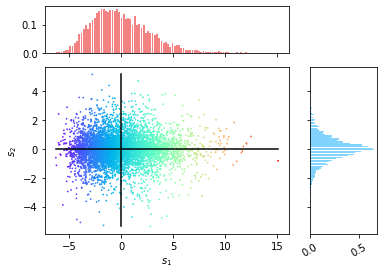

In [13]:
# Getting the source signals
# s1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), size=6000)

s1 = np.random.gamma(7.5, size=6000)
s1 -= s1.mean()

# s1 = np.random.normal(scale=0.5, size=6000)

# Laplacian with null mean and unit variance
s2 = np.random.laplace(scale=0.5 ** (0.5), size=6000)
# s2 = np.random.normal(size=6000)

# Plotting the time series
content.plot_sources_time_domain(s1, s2, sampling_frequency = 2048)

# plotting their joint distribuition
content.generate_sources(s1,s2)
content.plot_sources_and_observations(s1, s2, "sources")


&emsp;&ensp; So, considering a mixing process expressed by [Equation 2](#eq2), where now $𝑯=\begin{bmatrix} 2 & 3 \\ 2 & 1 \end{bmatrix}$ (again, we don't know $𝑯$), the joint distribuition of the observations is plotted below. You can change the values of $𝑯$ to see how the correlations change. Note that the two main variantions of the data is not along the coordinate axis anymore, but it is along the directions of the columns of $𝑯$, i.e., in the directions of the vectors $𝒉_1 = \begin{bmatrix} 2 & 2 \end{bmatrix}^T$ and $𝒉_2 = \begin{bmatrix} 3 & 1 \end{bmatrix}^T$. The vectors scale in the chart is bigger to better the visualization.

&emsp;&ensp; Obs.: if you choose any diagonal matrix the observation signals in the linear system in [Equation 1](#eq1) won't be a linear combination of $s_1$ and $s_2$, instead $x_1$ and $x_2$ will be equal to one of the two sources scaled by the correspondent element in $𝑯$ matrix. In another words, the obserations will be idenpendents, consequentely uncorrelated, hence the PCA method "won't do anything" because as said, to apply the PCA some redundancy needs exist [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references). Actually, the PCA steps will work correctly, but it will result in the same observation signals because the initial signals are maximally uncorrelated.

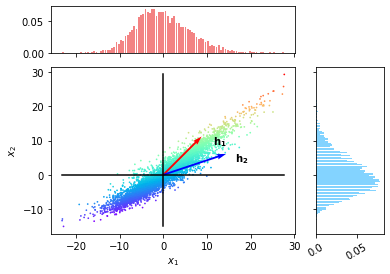

In [14]:
# Defining the mixing matrix H
H = np.array(
    [[2, 3], 
    [2, 1]],
    dtype=int)

# Doing the matix multiplication x=Hs and plotting their joint distribuition
x = np.dot(H, np.array([s1, s2]))
x1 = x[0,:]
x2 = x[1,:]

content.plot_sources_and_observations(x1, x2,"observations",H=H)
# content.plot_sources_and_observations(np.array([1,1,0,-1,-1,-1,0,1]), np.array([0,1,1,1,0,-1,-1,-1]),"observations",H=H)

&emsp;&ensp; Looking the previous image, we can see by the values of the axis and the distribuition of the data that the values are varying more along the x axis than the y axis. Better, if we look carefully, the grater variance of the data is in a direction between $𝒉_1$ and $𝒉_2$. So, if we aling the direction of this maximum variance to the direction of one of the axis, the new coordinate system could be represented by the basis vectors $(𝒖_1,𝒖_2)$ as the image below. So, we need basically find the orthogonal transformation to rotate the data to be represented in this new coordinate system. This is the central idea of the PCA, i.e., the PCA will search in our data the direction that corresponds to the maximum data variance, in sequence it will search for a orthogonal diretion the corresponds to the second maximum variace, and so on. The PCA will find $M$ orthogonal directions, where $M$ is the number of dimensions of the data (here 2, but for our EMG data is 64) if no dimension reduction is used, but if this procudere is applied, the PCA will find the most $M-P$ relevant directions, where $P$ is the number of dimensions to ignore/remove. 

&emsp;&ensp; After finding the diretions, the PCA multiplies the data array $𝒙 = \begin{bmatrix} x_1 & x_2 \end{bmatrix}^T$ by the orthogonal matrix $𝑼 = \begin{bmatrix} 𝒖_1 & 𝒖_2 \end{bmatrix}$ yielding an orthogonal projection of the data in the coordinate system definig by the basis vectors in $𝑼$, or in another words, this resulting in rotating the data distribuition [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references). The orthogonal projections of the data gives another set of random variables, $x_1^{PCA}$ and $x_2^{PCA}$, and these variables are the principal components of the data, where $x_1^{PCA}$ is the first principal component (the one whose variance is maximum) and  $x_2^{PCA}$ is the second principal component, and it is uncorrelated to the principal component, or at least as maximum as possible. 

&emsp;&ensp; Obs.: If you wish to see the values of the covariance matrix of $x_1$ and $x_2$ remove the $\it{\#}$ symbol of the code liine ```print("\nCovariance Matrix Before PCA\n", np.around(np.cov(np.array([x1, x2])),3))``` and run again the code cell below.

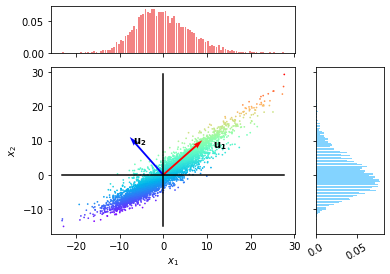

In [15]:
content.plot_sources_and_observations(x1, x2,"observations",eigen=True)

# print("\nCovariance Matrix Before PCA\n", np.around(np.cov(np.array([x1, x2])),3))

&emsp;&ensp; The question now is how to find this orthogonal vectors? Before searching for these vectors, the centering of the observation vector $𝒙 = \begin{bmatrix} x_1 & x_2 \end{bmatrix}^T$ is done, i.e., we subtract its mean value from from the respective observation variable, [Equation 3](#eq3). This is done because siplifies the computation of the second order statistics that PCA uses. So, the orthogonal vectors $𝒖_i$ can be founded from the covarince matrix $𝑪_x$ of the centered observations. It is well known from basic linear algebra that this vectors are the eigenvectors of the $𝑪_x$ (with unit norm), and the eigenvalues $d_i$, [Equation 4](#eq4), are the variances [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references), where $𝑫$ is a diagonal matrix. Remember, since $𝑼$ is an orthogonal matrix, it satisfies $𝑼^T = 𝑼^{-1}$. The ordering of the eigenvectors $𝒖_1$ and $𝒖_2$ is such that the corresponding eigenvalues $d_1$ and $d_2$ satisfying $d_1 > d_2$, i.e., the $𝒖_1$ corresponds the direction with maximum variation of the data ($\sigma_1^2 = d_1$) leading the first principal component and so on. Hence, to find the principal components or the representation with less correlation as possible we need only do a matricial multiplication as in [Equation 5](#eq5). See the implementation in the code cell below.

<a name="eq3"></a>
$$\begin{array}{cc}𝒙 \gets 𝒙 - E\{𝒙\} & (3) \end{array}$$
<br></br>
<a name="eq4"></a>
$$\begin{array}{cccc}𝑪_x = 𝑼 𝑫 𝑼^T, & 𝑫 = \begin{bmatrix} d_1 & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & d_m \end{bmatrix},& 𝑼 = \begin{bmatrix} 𝒖_1 & ... & 𝒖_m \end{bmatrix} & (4) \end{array}$$
<br></br>
<a name="eq5"></a>
$$\begin{array}{cc}𝒙^{PCA} = 𝑼^T 𝒙\ & (5) \end{array}$$


Covariance Matrix After PCA
 [[ 1.763  0.   ]
 [ 0.    70.198]] 



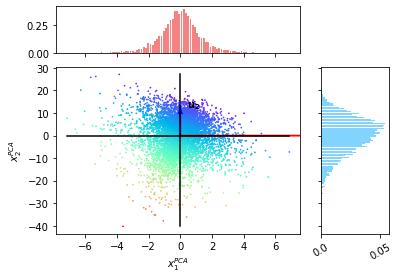

In [16]:
# Centering the observations (turning their mean null)
x1 = x1 - np.mean(x1)
x2 = x2 - np.mean(x2)
x = np.array([x1, x2])

# Eigenvalue and Eigenvector Decomposition
Cxx = np.cov(x)
d, U = np.linalg.eigh(Cxx)
D = np.diag(d)

# Appling the PCA to the observations
x_pca = np.dot(U.T, x)

print("\nCovariance Matrix After PCA\n", np.around(np.cov(x_pca),3),'\n')

# Plotting the new uncorrelated observations x1_pca and x2_pca
content.plot_sources_and_observations(x_pca[0,:], x_pca[1,:],"observations PCA",eigen=True)

&emsp;&ensp; From the covariance matrix is possible to conclude that new random variables are uncorrelated since the values of the secondary diagonal are null. So, seeing the generated charts before, we can say that the PCA tries to obtain an orthogonal transformation that rotates the joint distribuition of the data obtaining a new joint distribuition, where the new random variables are correlated the minimum as possible (minimum redundancy). This search is done by maximizing the variances of the principal components and so, the data are represented in a coordinated system where the maximum joint variances of the data has the same direction of the axis.

&emsp;&ensp; One can say that if independence can be seen as lack of redundancy and the PCA tries to reduce the redundance, why can not PCA be used to estimate the sources? The answer is that PCA uses covariances, which informally can be seen as a weak measure of independence.

### Whitening

&emsp;&ensp; Remeber that in [mathematical contextualization](#scrollTo=rX0pSaXab7iD) we said that one of the indeterminances of the BSS problem is that the variances (energies) of the source signals can't be determined and we assume they are equal one. So, another pre processing step that is need to achieve this and simplies the computations in the ICA is to normilize the variances of the principal components ($𝒙^{PCA}$), i.e., to turn the variances equals one. This is the work of whitening, since a white random variable has zero mean and unit variance.

&emsp;&ensp; This is just a scaling problem and is solved based on the variance property $E\{(\alpha x_i)^2\} = \alpha^2E\{x_i^2\}$, where the mean of the random variable $x_i$ is null. So, if $x_i$ has variance equals $\sigma_i^2$, to turn it equals the unit we need to divide the samples of $x_i$ by its standard deviation, i.e., if $\alpha = 1/\sqrt{\sigma^2}$ so $E\{(\alpha x_i)^2\} = E\{x_i^2\}/\sigma^2 = 1$. Moreover, as said previouslly, the eigenvalues $d_i$ are the variances of the $x_i^{PCA}$ variables, so we need just multiply the principal components by the corresponding $1/\sqrt{d_i}$ scaling factor. Hence, considering the eigenvalues matrix $𝑫$ in [Equation 4](#eq4) we need just find the inverse square root matrix $𝑫^{-\frac{1}{2}}$ and then multiply $𝒙^{PCA}$ by it, as in [Equation 6](#eq6). See the implementation in the code cell below. Note that the covariance matrix is equal to the identity matrix.

<a name="eq4"></a>
$$\begin{array}{ccc}𝒙^{PCA\_White} = 𝑫^{-\frac{1}{2}}𝒙^{PCA}, & 𝑫^{-\frac{1}{2}} = \begin{bmatrix} d_1^{-\frac{1}{2}} & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & d_m^{-\frac{1}{2}} \end{bmatrix} & (6) \end{array}$$

Covariance Matrix After Whitening
 [[1. 0.]
 [0. 1.]] 



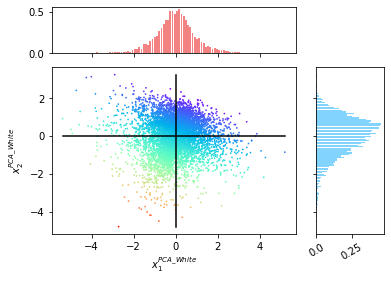

In [17]:
# Computing the D^-0.5 matrix
D_inv_sqrt = np.sqrt(np.linalg.inv(D))
x_white = np.dot(D_inv_sqrt, x_pca)

print('Covariance Matrix After Whitening\n',np.around(np.cov(x_white),3),'\n')

content.plot_sources_and_observations(x_white[0,:], x_white[1,:],"observations PCA_White")

&emsp;&ensp; Obs.: _**The PCA method is responsible to turn the observations uncorrelated as maximum as possible, while the whitenig redistributes the data to achieve unit variance for each uncorrelated component**_.

&emsp;&ensp; As seen, the orthogonal matrix $𝑼$ rotates the data, so after doing the normalization of the variances we can rotate again the data doing $𝑼𝒙^{PCA\_White}$ to return to the [initial coordinate system](#scrollTo=VQ2oBe1eRwaA), .i.e., after the PCA and Whitenig the statistics (mean and covariance) of the data and their "spacial" distribuition are transformed mantaining the representation on the original coordinate system. After returning to the initial coordinate system note from the charts generated below that the variables $x_i^{PCA\_White}$ are not equal to the orignal $s_i$, but their joint distribuition are similar differing from a rotation angle. So, is here the ICA enters, it is responsible to find the orthogonal matrix that does the last rotation and estimates the original sources trying to achieve the statistical idependence. The PCA can't find the sources because it uses second order statics, which is not the best way to measure idependence while the ICA use stroger concepts, as mutual information.

&emsp;&ensp; Obs.: _**Note the importance of PCA and whitening methods as a pre-processing step to the ICA. After apply these methods the ICA needs just find an orthogonal matrix $𝑩$ and being orthogonal implies $𝑩^T=𝑩^{-1}$, i.e., the ICA needs find almost half of the elements of $𝑩$ instead of find all elements of $𝑯^{-1}$, where $𝑩=\widehat{𝑯^{-1}}$. This is the reason of why some authors say that the PCA reduces the ICA problem ro the half**_.

&emsp;&ensp; Hence, combining all the previous steps we can define the final equation that describes both, the PCA and Whitening, as expressed in [Equation 7](#eq7), where $𝒛$ is the uncorrelated whitened observation matrix, and from now on will named whitened (or observation) matrix.

<a name="eq7"></a>
$$\begin{array}{ccc}𝒛 = 𝑾 𝒙, & 𝑾 = 𝑼 𝑫^{-\frac{1}{2}} 𝑼^T = 𝑪_x^{-\frac{1}{2}} & (7) \end{array}$$

Covariance Matrix After Whitening
 [[ 1. -0.]
 [-0.  1.]] 



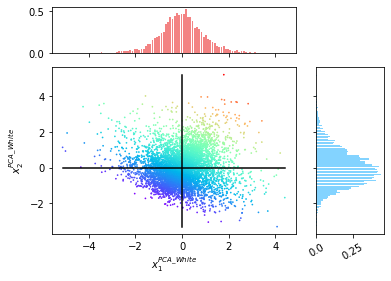


Original joint distribuition of source signals


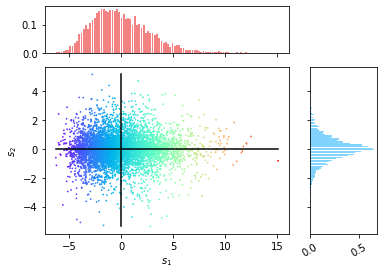

In [18]:
x_white = np.dot(U, np.dot(D_inv_sqrt, x_pca))

print('Covariance Matrix After Whitening\n',np.around(np.cov(x_white),3),'\n')
content.plot_sources_and_observations(x_white[0,:], x_white[1,:],"observations PCA_White")

print('\nOriginal joint distribuition of source signals')
content.plot_sources_and_observations(s1, s2, "sources")

&emsp;&ensp; Now is your turn, implement in the code cell below a python function that receives a argument the observation signals $𝒙$ and returns the uncorrelated whitened observations $𝒛$. The code cell below shows the template of how to create a function in python with several arguments and return variables.

In [19]:
# Implement your code here

In [20]:
def function_name(argument_1, argument_2):
  
  # TODO: PCA whitening the generates the python variable z that corresponds to the uncorrelated whitened observations.
  z
  alpha

  return z, alpha

## Independent Component Analysis (ICA)



&emsp;&ensp; Following the discussion, the ICA will find a representation of the data where the new random variables, named independent components, are as independent as possible. It sounds confusing say "more independent as possible", but this is due to in practical situations not been possible, in general, to find a representation where the components are really independent. However, this not prevents the use of ICA since it is supported by another important assumption:

> * The probability distribiton of the sources $s_j, j=1,\cdots,N$ must be non-gaussian. In fact, may exists no more than one gaussian sources [(COMON; JUTTEN, 2010; HYVÄRINEN; KARHUNEN; OJA, 2001)](#scrollTo=references).

&emsp;&ensp; To understanding why this assumption must be satisfied, go to [initial code cell](#scrollTo=yPFBhMSPRwZ-) and let the sources be gaussian distribuitions, i.e., define `s1` and `s2` variables as random variables by removing the $\#$ symbol from line codes that contains `np.random.normal` and run all code cells before this section. You will see that after PCA and Whitening the $z_i$ variables in $𝒛$ are both gaussian. So, as the ICA finds an orthogonal transformation, when we apply this transformation to $𝒛$ the new random variables will be gaussian (to see this execute the code cells below) and we can't say that they are the "true" estimation of the sources, because we can keep applying orthogonal transformations and the variables will keep being gaussian, in order words, we have infinite solutions to the problem and any of them can be a good estimation of the true sources. Note the places and colors of the points of this figure to the one generated [here](#scrollTo=yPFBhMSPRwZ-), it is highly possible that the points are not in the same coordinates, so the estimated sources are not equal to the sources, we can say this because in this case we are 100% certain about how the sources are disposed, but this is not true in practical situations. 

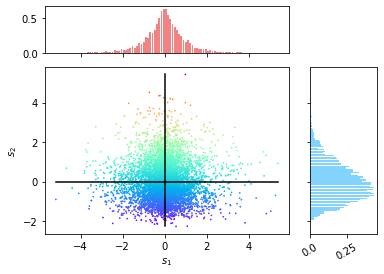


Original joint distribuition of source signals


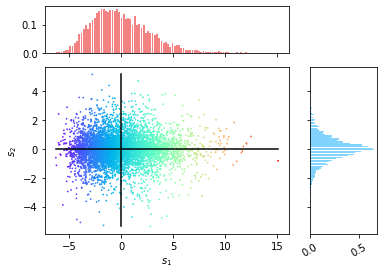

In [21]:
# Show the ICA effect on the graph
B = content.fastICA(x_white, M = 2, max_iter = 50, Tolx = 0.0001, cost = 3)

s_est = np.dot(B.T, x_white)

content.plot_sources_and_observations(s_est[0,:], s_est[1,:])

print('\nOriginal joint distribuition of source signals')
content.plot_sources_and_observations(s1, s2, "sources")

> * We could define ICA as follows: _**assuming the sources $s_i, j=1,...,N$ are satistically idenpendent, has a non-gaussian distribuition and unit variance, the ICA finds a orthogonal linear transformation given by a matrix $𝑩$, so that the estimatives of the sources, $\widehat{s_j}$, are as independent as possible**_.

&emsp;&ensp; To find the sources the ICA uses cost functions that measures the non-gaussianity and the statistical idenpendence of the estimated sources trying to maximize these functions, so it is a numerical optimization problem. By this way, the ICA can be formulated measuring the non-gaussianity using the kurtosis [(HYVÄRINEN; KARHUNEN; OJA, 2001; HYVÄRINEN; OJA, 1997)](#scrollTo=references) or negentropy [(HYVÄRINEN; KARHUNEN; OJA, 2001; HYVÄRINEN, 1999)](#scrollTo=references). The negentropy is a measure of how much the entropy of a random variable is distant from the entropy of a gaussian variable, considering both with equal mean and variance. So, the more distant the kurtosis value or the entropy of the estimation are from the same measures for the gaussian, more non-gaussian the estimated source is. Considering the independece, the ICA can be formulated based on the mutual information, that can be seen also as a natural measure for independence [(HYVÄRINEN; KARHUNEN; OJA, 2001; HYVÄRINEN, 1999)](#scrollTo=references). The mutual information is based on the entropy and tells you how much information you have about a random varibale by observing another one, so if there isn't any information, the variabeles are statistically independents. This concept seems similar to the correlation, but mutual information is based on the estimated probability density functions of the variables, so it is stronger.

&emsp;&ensp; In [(HYVÄRINEN, 1999)](#scrollTo=references) the mutual information is expressed in terms of the negentropy, since both are expressed in terms of the entropy, so, it is possible to see that to minimize the mutual information among random variables (is the same to maximize independence) is mathematically equivalent to maximize the negentropy (is the same of maximize the non-gaussianity). However, is a very difficult and cumbersome process to compute the entropy, and that is why [HYVÄRINEN (1999)](#scrollTo=references) proposed really good aproximations to the negentropy.

&emsp;&ensp; Now, the FastICA algorithm [(HYVÄRINEN, 1999; HYVÄRINEN; OJA, 1997)](#scrollTo=references) will be introduced. This algorithm is an efficient and widely used taht uses the assumptions of the ICA to estimate the sources. It is a fixed-point algorithm of fast convergence, which adopts the kurtosis  [(HYVÄRINEN; OJA, 1997)](#scrollTo=references) or th approximated negentropy  [(HYVÄRINEN, 1999)](#scrollTo=references) as a measure of non-gaussianity using new contrast functions.

### Kurtosis-based FastICA algorithm

&emsp;&ensp; Consider the estimated sources $\widehat{s_j}= 𝒘_j^T𝒛, j=1,\cdots,N$, where $w_j$ is a column vector named separation vector of the $j$ source and $𝒛$ is the whitened observation matrix. The presented algorithms apply the cost function to these estimations and iteratively optimizes the separation vectors to achieve the maximum of the value of cost functions. So, considering the kurtosis and the estimated source with null mean, the cost function to be optimized is the [Equation 8](#eq8) under the constraint $\|𝒘_j\|=1$, because the norm of $𝒘_j$ affects the varince of the $\widehat{s_j}$ and constraining $𝒘_j$ to have unit norm implies the estimated source also has unit variance  [(HYVÄRINEN; OJA, 1997)](#references).

<a name="eq8"></a>
$$\begin{array}{cc}kurt(\widehat{s_j}) = E\{\widehat{s_j}^4\} - 3 (E\{\widehat{s_j}^2\})^2 & (8) \end{array}$$

&emsp;&ensp; To maximize or minimize the [Equation 8](#eq8) some gradient descent or ascent were developed, however the speed of convergence of these algorithms is slow and them need a good choice of the learning rate term. Then, [HYVÄRINEN and OJA (1997)](#references) propesed the use of fixed-point algorithms and after some simplifications they change the update rule as show in the algorithm below, where $𝒘_j(n)$ is the separation vector on the $n$ iteration.

> $\bullet$ Apply PCA and Whitening on $𝒙$ to obtain $𝒛$;

> $\bullet$ Initialize the separation matrix $𝑩$ to empty matrix;

> $\bullet$ For $j=1,\ldots,M$ do:

>> $1.$ Initialize vectors $𝒘_j(0)$ randomly with unit norm and do $n \gets 1$;

>> $2.$ $𝒘_j(n) \gets E \{ 𝒛 (𝒘_j^T(n-1) 𝒛)^3 \} -3 𝒘_j(n-1)$

>> $3.$ $𝒘_j(n) \gets 𝒘_j(n) - 𝑩 𝑩^T 𝒘_j(n)$;

>> $4.$ $𝒘_j(n) \gets 𝒘_j(n) / \| 𝒘_j(n) \|$;

>> $5.$ If $|𝒘_j(n)^{T}𝒘_j(n-1)|$ is not close enough to 1 do: $n \gets n+1$ and go back to step 2;

>> Else, add $𝒘_j(n)$ as the $j$ column of $𝑩$;

> $\bullet$ Get the estimated sources by $\widehat{𝒔} = 𝑩^T 𝒛$

&emsp;&ensp; Note that if it was desire to estimate just one source signal, only PCA and steps 1 to 5 (excluding 3) would be needed, but since we are interest in estimate several source signals we need to add those steps inside a loop block and add the step 3. This step is needed because it garantees that the new estimated separation vector is orthogonal to the others already estimated and hence, provies a new diferent source estimation in each interation [(HYVÄRINEN; OJA, 1997)](#references). However, doing $M$ iterations with orthogonalization step doesn't mean that we will find $M$ completely distinct sources, rember that the ICA is a general approach, so for some apllications may be possible to find $M$ distict sources, but for EMG decomposition this is not the case.

&emsp;&ensp; Besides kurtosis is not mathematically difficult to calculate it has some drawbacks in practice, when its value has to be estimated from a measured sample. The main problem is that kurtosis lacks robustness and can be very sensitive to outliers. Thus, other measures of non-gaussianity like negentropy might be better in some situations [(HYVÄRINEN; KARHUNEN; OJA, 2001)](#references).

&emsp;&ensp; Now is your turn! You must implement a function that corresponds to the above algorithm, based on the tips in the code cell below. It's not needed to implement the "Apply PCA and Whitening on $𝒙$ to obtain $𝒛$" step since you should done this in [here](#scrollTo=iKmgPbyPfJCG) after the whitening theory. Create a function which do the ICA procedure above. This function can receive or not arguments, this function can be called inside the for loop or you can implement the for loop inside the function, it's up to you. Moreover, in your code consider the if statement in step 5 as: If $|𝒘_j(n)^{T}𝒘_j(n-1)| \ge 0.998$.

In [22]:
# Implement your code here

In [23]:
M = 20

# A matrix with dimensions 10xM with empty values (in reality are float oint values
# near zero)
A = np.empty((10,M))
# B matrix with dimensions Mx(M+10) with zero values
B = np.zeros((M,M+10))

# For loop structure
for j in range(M):
  # TODO
  ...

# If, else if and else statement
if M < 10:
  ...
elif M <= 20:
  ...
elif M//2 == 0 or M*5 > 100:
  ...
elif M%2 == 1 and M > 20:
  ...
else:
  ...


# Creating an array of 100 elements, each of them being a random sample from a uniform distribution over [0, 1)
x = np.random.rand(100)

# Representative vector of m elements equal one
x = np.ones(M)

# Transposing
x_transpose = x.T
B_transpose = B.T

# Elements of the array powered by 2
x_squared = x * x
x_squared = x ** 2
x_squared = np.square(x)

# Elements of the array powered by alpha
alpha = 4.23
x_powered = x ** alpha
x_powered = np.power(x,alpha)

# Applying mathemtical formula to the elements of an array/matrix
def function(x):
  return x*x - 2*x + 1/x - x/10

x = function(x)

# Get the mean of an array
mean1 = x.mean()
mean1 = np.mean(x)

# Get the mean of a matrix
mean2 = B.mean() # considering all elements

# Get the mean of elements in a column: we must say to python that it must ITERATES OVER ROWS,
# i.e., it must varying the row numbers for a fixed column to compute the mean of that column.
# The rows of a matrix is the first dimension of this matrix, or the first axis. But in python,
# the indexing begins in 0, differently from Matlab that begins in 1, and this is the reason to use
# axis=0 below
mean2 = B.mean(axis=0)

# Get the mean of elements in a row: we must say to python that it must ITERATES OVER COLUMNS,
# i.e., it must varying the columns numbers for a fixed row to compute the mean of that row
# The columns of a matrix is the second dimension of this matrix, or the second axis. But in python,
# the indexing begins in 0, this is the reason to use axis=1 below
mean2 = B.mean(axis=1)

# Absolute value
alpha = abs(-0.452)
alpha = np.absolute(1.34-4.323)

# Norm of a vector
my_norm = np.linalg.norm(x)

# Norm of a matrix
my_norm = np.linalg.norm(B) # Frobenius norm

# Matricial operations
xx = np.dot(x,x)
xx = np.dot(x,x.T)
xx = np.dot(x.T,x)

Ax = np.dot(A,x)
Ax = A @ x

this_is_an_error = x @ A
this_is_an_error= np.dot(x,A)

AB = np.dot(A,B)
AB = A @ B

BA = np.dot(B.T,A.T)
BA = B.T @ A.T

this_is_an_error = np.dot(B.T,A)
this_is_an_error = B @ A.T

# Adding a vector as column or row of a matrix
# The vector dimensions must be compatible to the dimension of the matrix that it will be inserted.
# Moreover, vectors in python are column matrices
B = np.zeros((100,200))
w = np.ones(100)
y = np.ones(200)

# adding a array in the first column of B. Note w has the same number of elements of each column of B
A[:,0] = w
# adding a array in the column N of B
N = 54 # could be any number in [1,200]
A[:,N-1] = w

# adding a array in the fourth row of B. Note w has the same number of elements of each column of B
A[:,3] = y.T # will give an error
A[:,3] = y.reshape(1,-1)
# OBS.: Here the transpose method will not work, because Python considers any array with 1 dimension a colum vector.
# Dimension is indicated by the open and close of brackets. So, once you say a vector is one dimensional, to be able to
# use it as a column or row matrix you need change the shape of this array. Is this what the ".reshape(1,-1)" is done.
# The ".reshape(1,-1)" is telling "python, this array now has 1 row and -1 columns", wait, WHAT??? -1 columns??? Calm down,
# the python interprets the -1 as been the amount of colums that is need to transform this array in a row matrix. For example,
# im many situation the code just know the dimensions of data when it is runnig, like the amount of elements in the array that
# contains the time samples of the EMH recording, the lengh of this array will depend on the sampling frequency and the total
# record duratiuon. So when you tell to python use -1, it will count the amount of elements in this array and will construct
# a row matrix with the same number of columns to contain all elements.

# adding a array in the row N of B
N = 63 # could be any number in [1,100]
A[:,N-1] = y.reshape(1,-1)

ValueError: ignored

### FastICA algorithm based on Negentropy and Mutual Information

#### Negentropy
&emsp;&ensp; Let's see the negentropy, another measure of non-gaussianity, that is based on the concept of differential entropy and is more robust than kurtosis. When we use random vectors we can define the entropy of the random vector $𝒚=[y_1,\cdots,y_n]^T$ (where $y_i$ are random variables) in terms of the differential entropy [Equation 9](#eq9), where $H(𝒚)$ is the joint entropy and $f(𝒚)$ is the probabilty density function of $𝒚$, or it can be seen as the joint probabilty density function of the random variabels $y_1,\cdots,y_n$ [(HYVÄRINEN, 1999)](#references). A fundamental result of information theory based on the principle of maximum entropy afirms that a gaussian variable has the largest entropy among all random variables of equal variance and mean [(HYVÄRINEN, 1999; HYVÄRINEN; KARHUNEN; OJA, 2001)](#references).

<a name='eq9'></a>
$$\begin{array}{cc} H(𝒚) = H(y_1,\cdots,y_n) = -\int f(𝒚) log(f(𝒚)) d𝒚 & (9) \end{array}$$

&emsp;&ensp; Since we have ensured that our estiated sources have null mean (by centering the observatoins) and unit variance (by constraining the norm of the separation vectors to the unit), this means that we can use the entropy as a measure of non-gaussianity. So, in order to obtain a measure of non-Gaussianity that is zero for a gaussian variable and always non-negative, we can used a "normalized" version of the differential entropy called negentropy, [Equation 10](#eq10), where $𝒚_{gauss}$ is a Gaussian random variable of the same covariance matrix as $𝒚$ [(HYVÄRINEN, 1999)](#references).

<a name='eq10'></a>
$$\begin{array}{cc} J(𝒚) = H(𝒚_{gauss}) - H(𝒚) & (10) \end{array}$$

#### Mutual Information

&emsp;&ensp; Until now only measures of non-gaussianity were presented, but what about the measures of independence? As we said, the Mutual Information, [Equation 11](#eq11), is a natural measure of independence. We decide to express the Mutual Information as a sum of entropy to avoid difficult formulas. Note that if the random variables $y_1,\cdots,y_n$ are mutually independent we have that joint entropy in [Equation 9](#eq9) can be rewriten as a sum of the entropy of each individual variable, due to the fact that 1) the joint PDF satisfies $f(𝒚)=f(y_1) f(y_2) \cdots f(y_n)$, 2) the logarithm of a product is the sum of the logarithms and 3) the integral be a linear operator. So, by this way the first and second terms in the right of [Equation 11](#eq11) are equal and $I(y_1,\cdots,y_n) = 0$. This is the idea of ICA, it minimizes the Mutual Information of the data to find the most independent as possible sources.

<a name='eq11'></a>
$$I(𝒚) = I(y_1,\cdots,y_n) = \Big[ \sum_{j=1}^n H(y_j) \Big] - H(𝒚), \begin{array}{ccr} & I(𝒚) \ge 0 & (11) \end{array} $$

&emsp;&ensp; Consider that the random variables $y_j$ can represent the estimated sources and the gaussian random variables $y_j^{gauss}$, both with unit variance, null mean and uncorrelated (remember that just for gaussian variables uncorrelation implies independence). Since $y_j^{gauss}$ are independent, we saw from the last paragrah that $ H(𝒚^{gauss}) = \sum_{j=1}^n H(y^{gauss}_j) $, so we can add $ H(𝒚^{gauss}) $ on both sides of [Equation 11](#eq11) without changing it, see [Equation 12](#eq12). Note the similarity of the terms of [Equation 12](#eq12) with the definition of negentropy, [Equation 11](#eq11). _**This means that the Mutual Information can be rewrite in terms of the negentropy as in [Equation 13](#eq13) [(HYVÄRINEN, 1999)](#references), i.e., the measure of statistical independence can be computed by a measure of non-gaussianity**_.

<a name='eq12'></a>
$$ \begin{array}{ccr} I(𝒚) + \sum_{j=1}^n H(y^{gauss}_j) = \Big[ \sum_{j=1}^n H(y_j) \Big] - H(𝒚) +  H(𝒚^{gauss})  \\ I(𝒚) = \Big[ \sum_{j=1}^n H(y_j) - H(y^{gauss}_j) \Big] +  H(𝒚^{gauss}) - H(𝒚)  & (12) \end{array} $$

<a name='eq13'></a>
$$I(𝒚) = I(y_1,\cdots,y_n) = J(𝒚) - \Big[ \sum_{j=1}^n J(y_j) \Big] \begin{array}{cr}  & (13) \end{array} $$

&emsp;&ensp; We are not going to focus on the mathematical complexity to express the Mutual Information in terms of the negentropy, instead we will show an intuitive way, if you wish see the mathematical formulations we recomed you read [(COMON,1994)](#references). Thinking in the same way we did for [Equation 11](#eq11), if the random variables $y_1,\cdots,y_n$ are mutually independent we have that joint entropy in [Equation 9](#eq9) can be rewriten as a sum of the entropy of each individual variable, as well as the mutual negentropy in [Equation 10](#eq10) can be rewrite as a sum of the individual negentropies, and as before, the first and second terms in the right of [Equation 13](#eq13) are equal and $I(y_1,\cdots,y_n) = 0$.

> * _**Hence, since the negentropy assumes non-zero values its easy to note that to minimize $I(𝒚)$ corresponds to maximize the sum of the individual negentropies [(HYVÄRINEN, 1999;  HYVÄRINEN; KARHUNEN; OJA, 2001)](#references), i.e., the maximization of statistical independence among the estimated sources is achieved by maximizing the non-gaussianity of each individual estimated source**_.

&emsp;&ensp; As the computation of the negentropy is difficult, some approximations based on new constrast functions can be founded in [(HYVÄRINEN, 1998, 1999)](#references). Since the estimated source is $\widehat{s_j} = 𝒘_j^T𝒛$ and the separation vector $𝒘_j$ is the one to be founded, the approximated negentropy is a function of it and can be represent in [Equation 14](#eq14), where $G(\cdot)$ is practically any non-quadratic function. Hence, considering from [Equation 13](#eq13) that to minimize $I(𝒚)$ corresponds to maximize the sum of the individual $J(𝒘_j)$, and maximize this sum is the same of maximizing each individual negentropy (because it is a non-negative measure), the problem is to maximize [Equation 14](#eq14) under the constraint $\| 𝒘_j \| = 1$. [(HYVÄRINEN; OJA, 1997)](#references) suggested some equations to $G(\cdot)$ as represented in the set of [Equations 15](#eq15).

<a name='eq14'></a>
$$\begin{array}{cc} J(𝒘_j) = [ E\{G(𝒘_j^T 𝒛)\} - E\{G(y_{gauss})\}]^2 & (14) \end{array}$$
$$$$
<a name="eq15"></a>
$$\begin{array}{cr} G_1(k) = log(cosh(k)) & \\ G_2(k) = exp(-k^2/2) & (15) \\ G_3(k) = k^4/4 & \end{array}$$

&emsp;&ensp; To maximize [Equation 14](#eq14) some gradient-based algorithm can be applied, however as the kurtosis case, the speed of convergence of these algorithms is slow and them need a good choice of the learning rate term. Then, after some simplifications and assumptions in [(HYVÄRINEN; OJA, 1997)](#references) a fixed-point algorithm was developted where $𝒘_j(n)$ is the separation vector on the $n$ iteration. The final FastICA algorithm that maximizes the negentropy or minimizes the Mutual Information are below, where $g(\cdot)$ and $g'(\cdot)$ are the first and second derivatives of $G(\cdot)$, respectively, and are expressed in [Equations 16](#eq16). Note that if you choose $G(k) = k^4/4$ the algorithm below is identical to the algorithm based on kurtosis, this is because the kurtosis is the fourth moment.

<a name="eq16"></a>
$$\begin{array}{ccr} g_1(k) = tanh(k) & g'_1(k) = 1 - {tanh}^2(k) & \\ g_2(k) = -k \text{ } exp(-k^2/2) & g'_2(k) = (k^2 - 1) \text{ } exp(-k^2/2) & (16) \\ g_3(k) = k^3 & g'_3(k) = 3k^2 & \end{array}$$

&emsp;&ensp; Now is your turn! You must improve the implemented [algorithm based on kurtosis](#scrollTo=EmDbaU3ye02T). You must create a way of choose which  $G(\cdot)$ function is desired to use and after choosing, this desired function must be used in the separation vector computation. As before, in your code consider the if statement in step 5 as: If $|𝒘_j(n)^{T}𝒘_j(n-1)| \ge 0.998$.

> $\bullet$ Apply PCA and Whitening on $𝒙$ to obtain $𝒛$;

> $\bullet$ Initialize the separation matrix $𝑩$ to empty matrix;

> $\bullet$ Choose one of the $G(\cdot)$ function in [Equations 15](#eq15) and use their correspond derivates in [Equations 16](#eq16);

> $\bullet$ For $j=1,\ldots,M$ do:

>> $1.$ Initialize vectors $𝒘_j(0)$ randomly with unit norm and do $n \gets 1$;

>> $2.$ $𝒘_j(n) \gets E \{ 𝒛 g(𝒘_j^T(n-1) 𝒛) \} - E\{g'(𝒘_j^T(n-1) 𝒛)\}𝒘_j(n-1)$

>> $3.$ $𝒘_j(n) \gets 𝒘_j(n) - 𝑩 𝑩^T 𝒘_j(n)$;

>> $4.$ $𝒘_j(n) \gets 𝒘_j(n) / \| 𝒘_j(n) \|$;

>> $5.$ If $|𝒘_j(n)^{T}𝒘_j(n-1)|$ is not close enough to 1 do: $n \gets n+1$ and go back to step 2;

>> Else, add $𝒘_j(n)$ as the $j$ column of $𝑩$;

> $\bullet$ Get the estimated sources by $\widehat{𝒔} = 𝑩^T 𝒛$

In [ ]:
# Implement your code here

## References

COMON, Pierre. Independent component analysis — A new concept?. Signal Processing, v. 36, n. 3, p. 287-314, 1994. DOI: [10.1016/0165-1684(94)90029-9](https://doi.org/10.1016/0165-1684(94)90029-9)

COMON, Pierre; JUTTEN, Christian. Handbook of Blind Souce Separation Independent Component Analysis and Applications. First ed. Oxford: Elsevier, 2010.

HYVÄRINEN, Aapo. Fast and robust fixed-point algorithms for independent component analysis. IEEE Transactions on Neural Networks, v. 10, n. 3, p. 626–634, 1999. DOI: [10.1109/72.761722](https://doi.org/10.1109/72.761722).

HYVÄRINEN, Aapo. New approximations of differential entropy for independent
component analysis and projection pursuit. Advances Neural Inform. Processing Syst. 10, pp. 273–279. MIT Press, 1998.

HYVÄRINEN, Aapo; KARHUNEN, Juha; OJA, Erkki. Independent Component Analysis. First ed. New York: John Wiley & Sons, 2001.

HYVÄRINEN, Aapo; OJA, Erkki. A Fast Fixed-Point Algorithm for Independent Component Analysis. Neural Computation, v. 9, p. 1483–1492, 1997. DOI: [10.1109/ICICIP.2010.5564273](https://doi.org/10.1109/ICICIP.2010.5564273).